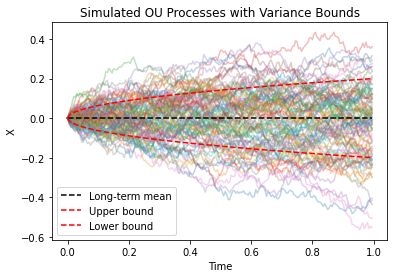

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
theta = 0.1
mu = 0.0
sigma = 0.2
dt = 0.005
T = 1.0
num_lines = 100

# Define initial conditions
X0 = 0.0
t = np.arange(0, T, dt)
N = len(t)

# Generate random Wiener process
dW = np.sqrt(dt) * np.random.randn(num_lines, N)

# Define function for simulating OU process
def simulate_OU(X0, theta, mu, sigma, dW, t):
    X = np.zeros((num_lines, N))
    X[:, 0] = X0
    for i in range(1, N):
        X[:, i] = X[:, i-1] - theta * (X[:, i-1] - mu) * dt + sigma * dW[:, i]
    return X

# Simulate OU process
X = simulate_OU(X0, theta, mu, sigma, dW, t)

# Plot results
plt.plot(t, X.T, alpha=0.3)
plt.plot(t, mu * np.ones_like(t), 'k--', label='Long-term mean')
plt.plot(t, mu + sigma * np.sqrt(t), 'r--', label='Upper bound')
plt.plot(t, mu - sigma * np.sqrt(t), 'r--', label='Lower bound')
plt.xlabel('Time')
plt.ylabel('X')
plt.title('Simulated OU Processes with Variance Bounds')
plt.legend()
plt.show()


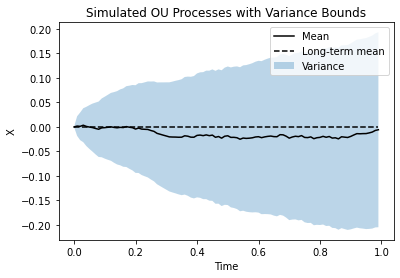

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
theta = 0.1
mu = 0.0
sigma = 0.2
dt = 0.01
T = 1.0
num_lines = 100

# Define initial conditions
X0 = 0.0
t = np.arange(0, T, dt)
N = len(t)

# Generate random Wiener process
dW = np.sqrt(dt) * np.random.randn(num_lines, N)

# Define function for simulating OU process
def simulate_OU(X0, theta, mu, sigma, dW, t):
    X = np.zeros((num_lines, N))
    X[:, 0] = X0
    for i in range(1, N):
        X[:, i] = X[:, i-1] - theta * (X[:, i-1] - mu) * dt + sigma * dW[:, i]
    return X

# Simulate OU process
X = simulate_OU(X0, theta, mu, sigma, dW, t)

# Calculate mean and variance over time
X_mean = np.mean(X, axis=0)
X_var_upper = X_mean + sigma * np.sqrt(t)
X_var_lower = X_mean - sigma * np.sqrt(t)

# Plot results
fig, ax = plt.subplots()
ax.plot(t, X_mean, 'k-', label='Mean')
ax.fill_between(t, X_var_lower, X_var_upper, alpha=0.3, label='Variance')
ax.plot(t, mu * np.ones_like(t), 'k--', label='Long-term mean')
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_title('Simulated OU Processes with Variance Bounds')
ax.legend()
plt.show()


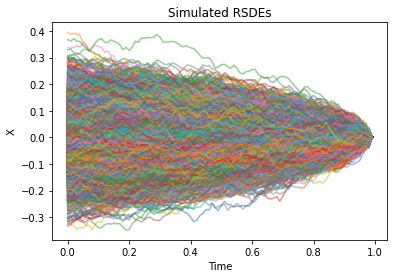

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
theta = 0.1
mu = 1.0
sigma = 0.1
dt = 0.01
T = 1.0
num_lines = 10000

# Define initial conditions
X0 = 0.0
t = np.arange(0, T, dt)
N = len(t)

# Generate random Wiener process
dW = np.sqrt(dt) * np.random.randn(num_lines, N)

# Define functions for simulating RSDEs
def f(x, t):
    return -theta * x

def g(t):
    return sigma

def p(x, t):
    return 1.0/np.sqrt(2*np.pi*sigma**2*dt) * np.exp(-(x - mu)**2/(2*sigma**2*dt))

def simulate_RSDE(X0, f, g, p, dW, t):
    X = np.zeros((num_lines, N))
    X[:, -1] = X0
    for i in range(N-2, -1, -1):
        dt = t[i+1] - t[i]
        X[:, i] = X[:, i+1] + f(X[:, i+1], t[i+1]) * dt - g(t[i+1])**2 * p(X[:, i+1], t[i+1]) * (X[:, i+1] - X[:, i]) / dt + g(t[i+1]) * dW[:, i+1]
    return X

# Simulate RSDEs
X = simulate_RSDE(X0, f, g, p, dW, t)

# Plot results
fig, ax = plt.subplots()
for i in range(num_lines):
    ax.plot(t, X[i], alpha=0.5)
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_title('Simulated RSDEs')
plt.show()


/var/folders/lr/ykbl1fhs1s96yqywr0b1ch2h0000gn/T/ipykernel_47323/3820955033.py:31: RuntimeWarning: divide by zero encountered in true_divide
  X[:, i] = X[:, i+1] + theta * p(X[:, i+1], t[i+1]) * (X[:, i+1] - X[:, i]) / dt + np.sqrt(dt/p(X[:, i+1], t[i+1])) * dW[:, i+1]
/var/folders/lr/ykbl1fhs1s96yqywr0b1ch2h0000gn/T/ipykernel_47323/3820955033.py:31: RuntimeWarning: invalid value encountered in multiply
  X[:, i] = X[:, i+1] + theta * p(X[:, i+1], t[i+1]) * (X[:, i+1] - X[:, i]) / dt + np.sqrt(dt/p(X[:, i+1], t[i+1])) * dW[:, i+1]


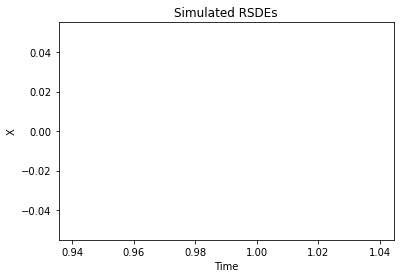

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
theta = 0.1
mu = 1.0
sigma = 0.2
dt = 0.01
T = 1.0
num_lines = 10

# Define initial conditions
X0 = 0.0
t = np.arange(0, T, dt)
N = len(t)

# Generate random Wiener process
dW = np.sqrt(dt) * np.random.randn(num_lines, N)

# Define function for two-peak distribution
def p(x, t):
    return 0.5/np.sqrt(2*np.pi*sigma**2*dt) * np.exp(-(x - mu)**2/(2*sigma**2*dt)) + \
           0.5/np.sqrt(2*np.pi*sigma**2*dt) * np.exp(-(x + mu)**2/(2*sigma**2*dt))

# Define function for simulating RSDE
def simulate_RSDE(X0, theta, p, dW, t):
    X = np.zeros((num_lines, N))
    X[:, -1] = X0
    for i in range(N-2, -1, -1):
        dt = t[i+1] - t[i]
        X[:, i] = X[:, i+1] + theta * p(X[:, i+1], t[i+1]) * (X[:, i+1] - X[:, i]) / dt + np.sqrt(dt/p(X[:, i+1], t[i+1])) * dW[:, i+1]
    return X

# Simulate RSDEs
X = simulate_RSDE(X0, theta, p, dW, t)

# Plot results
fig, ax = plt.subplots()
for i in range(num_lines):
    ax.plot(t, X[i], alpha=0.5)
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_title('Simulated RSDEs')
plt.show()
